# 准备环境导入相关包

In [83]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.10.0


设置TensorFlow环境，导入相关库，以便在后续的代码中进行深度学习和数据可视化等任务。
- import tensorflow as tf: 导入 TensorFlow 库，并给它一个别名 tf，以便在代码中更简洁地引用它。
- import numpy as np: 导入 NumPy 库，并给它一个别名 np。
- import matplotlib.pyplot as plt: 导入 Matplotlib 的 pyplot 模块，并给它一个别名 plt。
- print(tf.__version__): 打印 TensorFlow 的版本号。这可以帮助您确认您正在使用的 TensorFlow 版本。

# 数据处理

In [84]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

调用了fashion_mnist模块的load_data()函数来实际加载Fashion MNIST数据集。
- load_data()函数返回两个元组（tuple），分别代表训练集和测试集。
- train_images：一个形状为(60000, 28, 28)的NumPy数组，包含60,000个时尚图像的训练集。每个图像都是一个28x28的灰度图像，像素值在0到255之间。
- train_labels：一个包含60,000个标签的NumPy数组，与train_images中的图像一一对应。标签是整数，范围从0到9，表示10个不同的服装类别。
- test_images：一个形状为(10000, 28, 28)的NumPy数组，包含10,000个时尚图像的测试集。
- test_labels：一个包含10,000个标签的NumPy数组，与test_images中的图像一一对应。

In [107]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

为每一个分类设置名称，因为字体问题，好像不能设置成中文

In [86]:
train_images.shape


(60000, 28, 28)

In [87]:
len(train_labels)

60000

In [88]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [89]:
test_images.shape

(10000, 28, 28)

In [90]:
len(test_labels)

10000

#### - 训练集包含60000 个图像每个图像是一个28x28的矩阵
#### - 测试集包含10000 个图像每一个图像也是一个28x28的矩阵
#### - 图像和标签一一对应

In [91]:
first_image = train_images[0]  
print(first_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

#### 这些是第一个图像的像素值。这些像素值通常是0到255之间的整数，代表灰度级别。在训练神经网络之前，将这些值缩放到0到1之间，可以通过除以255来实现

## 归一化处理和数据可视化

In [92]:
train_images = train_images / 255.0

test_images = test_images / 255.0

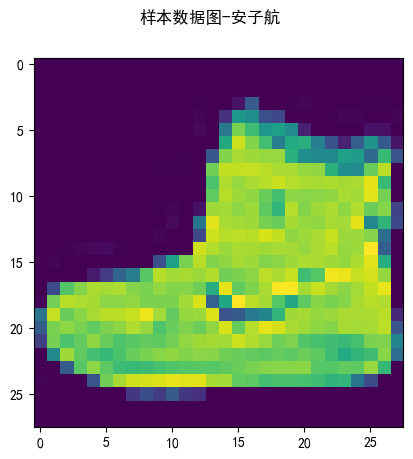

In [137]:
plt.figure()
plt.imshow(train_images[0])
plt.suptitle('样本数据图-安子航')
plt.show()


#### - 根据像素值显示第一个图像

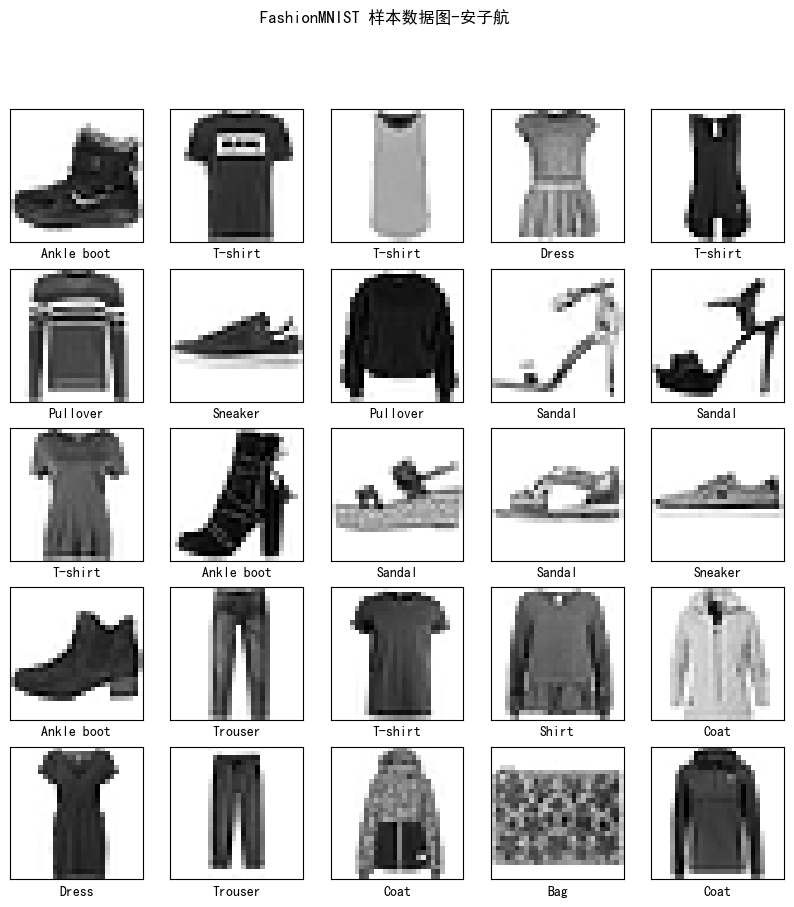

In [108]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.suptitle('FashionMNIST 样本数据图-安子航')
plt.show()

#### 查看前25个数据图和标签，确保数据无误
#### - 创建了一个5x5的子图网格，并在每个子图中显示了Fashion MNIST数据集中前25张训练图像，同时给每张图像添加了对应的类别标签。

# MLP模型构建

In [196]:
from keras import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras import Input

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=256,kernel_initializer='normal',activation='relu'))
# model.add(Dropout(rate=0.1))
model.add(Dense(units=64,kernel_initializer='normal',activation='relu'))
# model.add(Dropout(rate=0.1))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 256)               200960    
                                                                 
 dense_36 (Dense)            (None, 64)                16448     
                                                                 
 dense_37 (Dense)            (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


- Flatten层用于将多维输入“压平”成一维，常用在从卷积层到全连接层的过渡。
    它接收一个形状为(28, 28)的二维输入，并输出一个长度为784（28*28）的一维数组。input_shape参数定义了输入数据的形状。、
- 全连接层有256个神经元，每个神经元都与前一层（这里是Flatten层）的每个神经元相连。kernel_initializer='normal'指定了权重初始化方法。activation='relu'指定了使用ReLU激活函数。
- Dropout层在训练过程中随机将网络中的一部分神经元“关闭”，即将其输出设置为0。这有助于防止过拟合，因为它强制网络学习更鲁棒的特征。rate=0.1意味着在训练过程中，每个神经元有10%的概率被“关闭

- 第二个全连接层（Dense层），但这次只有64个神经元（units=64）。
同样使用ReLU作为激活函数，并有一个Dropout层（Dropout(rate=0.1)）来减少过拟合。
- 输出层，有 10 个神经元对应于 10 个类别。这个层使用了 'softmax' 激活函数，它将输出转换为概率分布，使得所有类别的预测概率之和为 1。

In [197]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

- optimizer='adam'：
选择了Adam优化器，它是一个非常流行的优化算法，适用于大多数深度学习问题。Adam结合了自适应学习率（如AdaGrad）和动量（如Momentum）的概念，通常可以更快地收敛并找到更好的局部最优解。
- loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)：
指定了模型在训练时要使用的损失函数。对于多分类问题，选择了SparseCategoricalCrossentropy，这是TensorFlow Keras中用于多分类问题的交叉熵损失函数的一个变体。
- metrics=['accuracy']：
这指定了在训练和测试过程中要监控的评估指标。在这里，您选择了accuracy，即分类准确率，作为评估指标。这意味着在训练过程中，Keras不仅会计算并报告损失值，还会计算并报告分类准确率。

In [198]:
H = model.fit(x=train_images,
              y=train_labels,
              validation_split=0.2,
              epochs=10,
              batch_size=128,
              verbose=1)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.6179 - accuracy: 0.7836 - val_loss: 0.4661 - val_accuracy: 0.8362
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.8529 - val_loss: 0.4155 - val_accuracy: 0.8478
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy: 0.8681 - val_loss: 0.3617 - val_accuracy: 0.8702
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.8780 - val_loss: 0.3437 - val_accuracy: 0.8774
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3158 - accuracy: 0.8843 - val_loss: 0.3386 - val_accuracy: 0.8798
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.8896 - val_loss: 0.3283 - val_accuracy: 0.8776
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.2800 - accuracy: 0.8964 - val_loss: 0.3234 - val_accuracy: 0.8856
Epoch 

- validation_split=0.2：这个参数用于从训练数据中划分出一部分作为验证集。在这里，0.2意味着20%的训练数据将被用作验证集，剩下的80%将用于训练。注意，当你使用validation_split时，不应再提供validation_data参数。

# 模型的评估

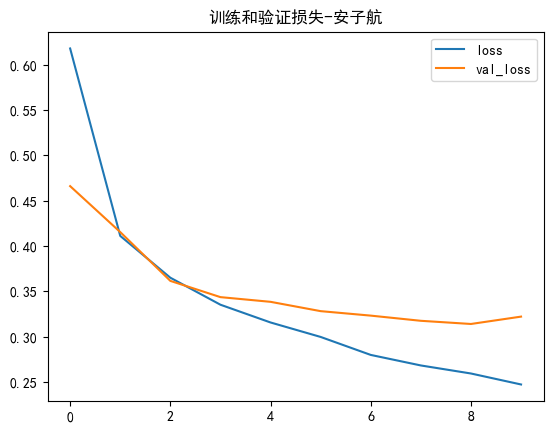

In [199]:
plt.plot(H.epoch, H.history['loss'], label='loss')
plt.plot(H.epoch, H.history['val_loss'], label='val_loss')
plt.title('训练和验证损失-安子航')
plt.legend()

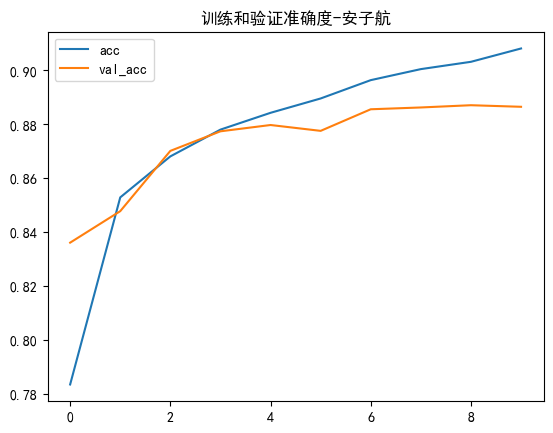

In [200]:
plt.plot(H.epoch, H.history['accuracy'], label='acc')
plt.plot(H.epoch, H.history['val_accuracy'], label='val_acc')
plt.title('训练和验证准确度-安子航')
plt.legend()

In [201]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3460 - accuracy: 0.8805 - 246ms/epoch - 787us/step

Test accuracy: 0.8805000185966492


- 通过运行这段代码，你可以得到模型在测试集上的性能评估结果，即损失值和准确率。这有助于你了解模型在未见过的数据上的表现，并据此进行进一步的模型调整或优化。

In [160]:
model.save('MLP_fashion_mnist')


INFO:tensorflow:Assets written to: MLP_fashion_mnist\assets


In [154]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 819us/step


In [155]:
predictions[0]
np.argmax(predictions[0])

9

In [156]:
test_labels[0]

9

- 在测试集上的测试结果与实际的标签一样。

In [157]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Text(0.5, 0.98, 'FashionMNIST 分类结果图-安子航')

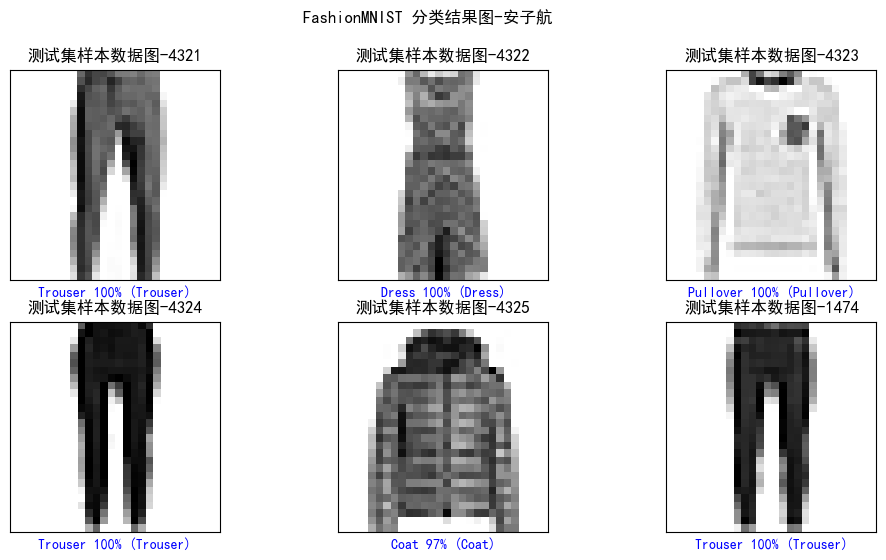

In [162]:
import matplotlib.pyplot as plt  
  
# 假设indices是一个包含五个索引的列表  
indices = [4321, 4322, 4323, 4324, 4325, 1474]  # 你需要确保这些索引在数据范围内  
  
# 设置图形大小以适应五个图像  
plt.figure(figsize=(12, 6))  
  
# 遍历索引并绘制图像和预测  
for i, idx in enumerate(indices, 1):  
    # 计算子图的位置（使用2x3布局）  
    row = (i - 1) // 3  
    col = (i - 1) % 3        
    # 绘制图像  
    plt.subplot(2, 3, i)  # 2x3布局，总共5个子图  
    plt.title(f'测试集样本数据图-{idx}')  
    plot_image(idx, predictions[idx], test_labels, test_images)  
      
    plot_image(idx, predictions[idx], test_labels, test_images)  
plt.suptitle('FashionMNIST 分类结果图-安子航')

- 绘制出第 i 个测试图像，并在其下方显示预测结果和真实标签。
- 绘制出一个条形图，显示模型对第 i 个测试样本的预测概率分布。

# 总结


在本次项目中，我成功构建并训练了一个多层感知机（MLP）模型，用于对FashionMNIST数据集进行分类。FashionMNIST是一个包含各类服装图像及其对应标签的数据集，适用于测试机器学习算法在图像分类任务中的性能。通过本项目，我深入理解了MLP模型在图像分类任务中的应用，并锻炼了数据预处理、模型训练与评估以及结果可视化的能力。

- 主要工作:
1. 数据预处理
导入FashionMNIST数据集，并进行数据清洗和整理。
对图像数据进行扁平化处理，以适应MLP模型的输入要求。
2. 模型构建与训练
设计了一个包含两个隐藏层的多层感知机模型，以学习图像中的分类特征。
使用SparseCategoricalCrossentropy作为损失函数，adam作为优化器，以监控模型的训练过程。
对模型进行多轮训练，并保存了训练好的模型权重，以便后续使用。
3. 模型评估与可视化
评估了模型在测试集上的分类准确率和损失值，以验证模型的性能。
通过可视化技术展示了训练过程中损失和准确率的变化曲线，便于理解模型的学习过程。
展示了部分测试样本的预测结果，并与真实标签进行比较，以分析模型的分类效果。

- 实验结果:
通过使用MLP模型，我在FashionMNIST数据集上取得了一定的分类效果。虽然相较于卷积神经网络（CNN），MLP在图像分类任务中的性能稍逊一筹，但它仍然能够学习到图像中的部分分类特征，并实现一定的分类准确率。通过本次实验，我更加深入地理解了MLP模型的工作原理和适用范围，为后续的机器学习项目积累了宝贵的经验。

- 改进方向:
1. 模型优化
尝试调整模型的超参数，如隐藏层数、神经元数量、学习率等，以优化模型的分类性能。
使用更复杂的模型结构，如深度神经网络（DNN），以提升模型的分类能力。
2. 特征提取
探索在MLP模型之前使用特征提取技术（如主成分分析PCA、自动编码器AE等），以获取更丰富的图像特征，并提升模型的分类性能。
3. 数据增强
使用数据增强技术（如旋转、缩放、平移等）扩充训练数据，以提高模型的泛化能力。